## 농어 무게 예측 (회귀)

In [1]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [7]:
import matplotlib.pyplot as plt

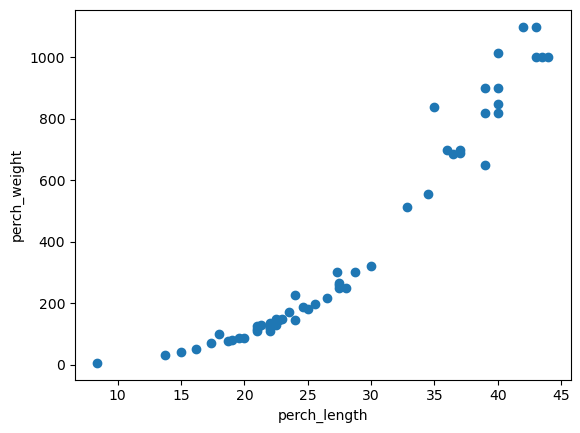

In [13]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('perch_length')
plt.ylabel('perch_weight')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# train/test split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [20]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [22]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

In [26]:
train_input.shape

(42,)

In [28]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이여야함 -> reshape()를 사용하여 2차원 배열로 바꾸기
# reshape()에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미

train_input = train_input.reshape(-1,1) # (42,1)의 2차원 배열로 바껴짐
test_input = test_input.reshape(-1,1)

In [30]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [32]:
train_input.shape

(42, 1)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knr = KNeighborsRegressor()

In [40]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [42]:
knr.score(test_input, test_target)

0.992809406101064

In [46]:
knr.score(train_input, train_target)

0.9698823289099254

In [50]:
# train 데이터보다 test 데이터의 score가 더 높기 때문에 과소적합 -> 모델이 더 잘 학습할 수 있게 복잡하게 만들기
# k-means의 경우 이웃의 수를 줄여 복잡하게 만들기 (이웃의 수가 적기 때문에 더욱 더 국지적으로 반응)

knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [52]:
knr.score(test_input, test_target)

0.9746459963987609

In [54]:
knr.score(train_input, train_target)

0.9804899950518966